In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
df = pd.read_csv('../analysis/cost_analysis/running_time/cost_running_time.csv',dtype={'Task': str})
df['Task'] = df['Task'].replace({"12 to 12": "12-well plate -> 12-well plate","24 to 24": "24-well plate -> 24-well plate", "96 to 96": "96-well plate -> 96-well plate", "384 to 384": "384-well plate -> 384-well plate"})
# transfer Task to color
tasks = df['Task'].unique()
# create a color map
color_map = {"12-well plate -> 12-well plate": "red", "24-well plate -> 24-well plate": "blue", "96-well plate -> 96-well plate": "green", "384-well plate -> 384-well plate": "orange"}
#color_map = {"12 to 12": "red", "24 to 24": "blue", "96 to 96": "green", "384 to 384": "orange"}
# add additional column


In [20]:
# add a new column to the dataframe
df['Color'] = df['Task'].map(color_map)
# rename the task names


In [21]:
df

,Task,Cost,Time,Color
0,12-well plate -> 12-well plate,12,70,red
1,12-well plate -> 12-well plate,12,61,red
2,12-well plate -> 12-well plate,12,70,red
3,12-well plate -> 12-well plate,70,281,red
4,12-well plate -> 12-well plate,70,286,red
5,12-well plate -> 12-well plate,72,277,red
6,12-well plate -> 12-well plate,107,454,red
7,12-well plate -> 12-well plate,112,481,red
8,12-well plate -> 12-well plate,115,490,red
9,12-well plate -> 12-well plate,138,594,red


/tmp/ipykernel_690294/265909237.py:23: RuntimeWarning: divide by zero encountered in log10
  y = 10**p(np.log10(x))
/u/yq/chem1906/anaconda3/envs/pipette_scheduling/lib/python3.9/site-packages/numpy/lib/_polynomial_impl.py:769: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv


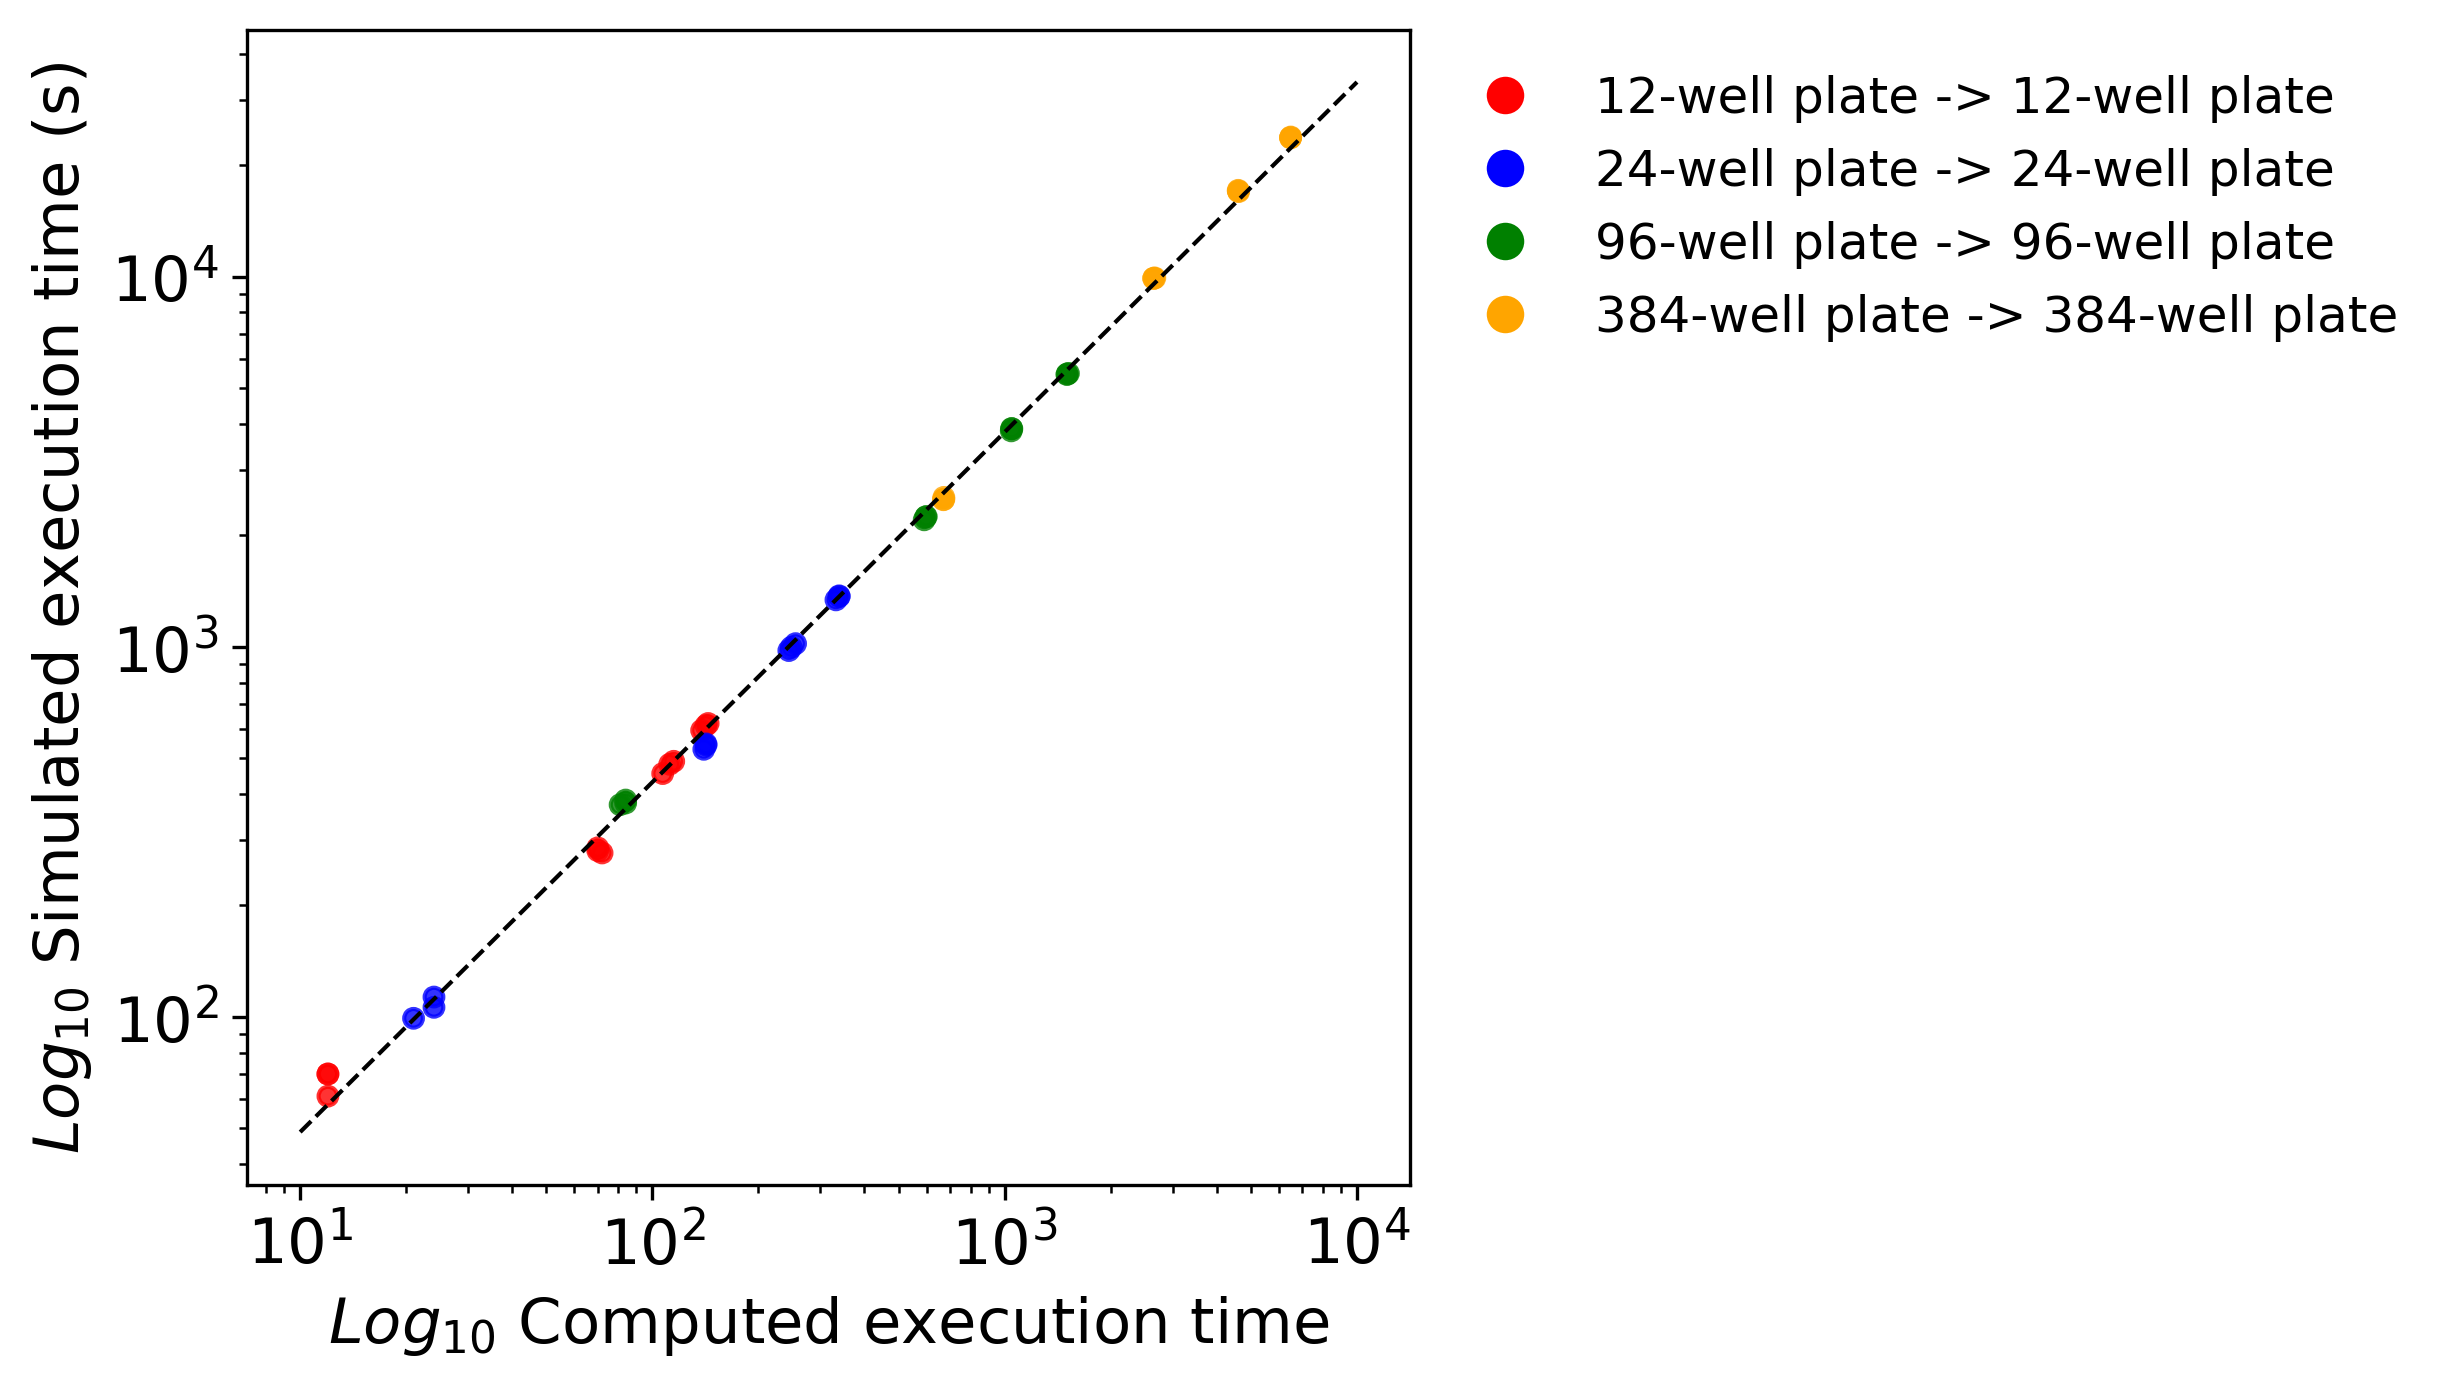

In [ ]:
# plot Time and Cost, label the color of the dot with the Task which are strings
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

ax.scatter(df['Cost'], df['Time'], c=df['Color'], alpha=0.8,s=20)

#ax.set_title('Time vs Cost')
# add a legend
legend_labels = {task: color for task, color in color_map.items()}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=task, markerfacecolor=color, markersize=10) for task, color in legend_labels.items()]
ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 1),frameon=False, fontsize=12)
# use log scale for y axis
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$Log_{10}$ Computed execution time', fontsize=15)
ax.set_ylabel('$Log_{10}$ Simulated execution time (s)', fontsize=15)

# set the ticks size
ax.tick_params(axis='both', which='major', labelsize=15)
# add a trend line
z = np.polyfit(np.log10(df['Cost']), np.log10(df['Time']), 1)
p = np.poly1d(z)
x = np.linspace(0, 10000, 1000)
y = 10**p(np.log10(x))
ax.plot(x, y, color='black', linewidth=1, linestyle='--')
